In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime
from pysolar.solar import get_altitude, get_azimuth
from pysolar.radiation import get_radiation_direct

import pandas as pd
import numpy as np
import seaborn as sns
import os, sys, json

sns.set_palette("muted")
sns.set_context("talk")
sns.set_style("white")
pd.set_option("display.max_columns", None)

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [3]:
# date = datetime.datetime.now()
KST = datetime.timezone(datetime.timedelta(hours=9))
date = datetime.datetime(2017, 3, 21, 13, 0, 0, tzinfo=KST)
date

datetime.datetime(2017, 3, 21, 13, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=32400)))

In [4]:
# Daejeon
lat = 36.3504
lon = 127.3845

In [5]:
alt = get_altitude(lat, lon, date)
alt

53.57702210048166

In [6]:
azi = get_azimuth(lat, lon, date)
azi

189.44917229657798

In [7]:
rad = get_radiation_direct(date, alt)
rad

961.3376847317991

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator


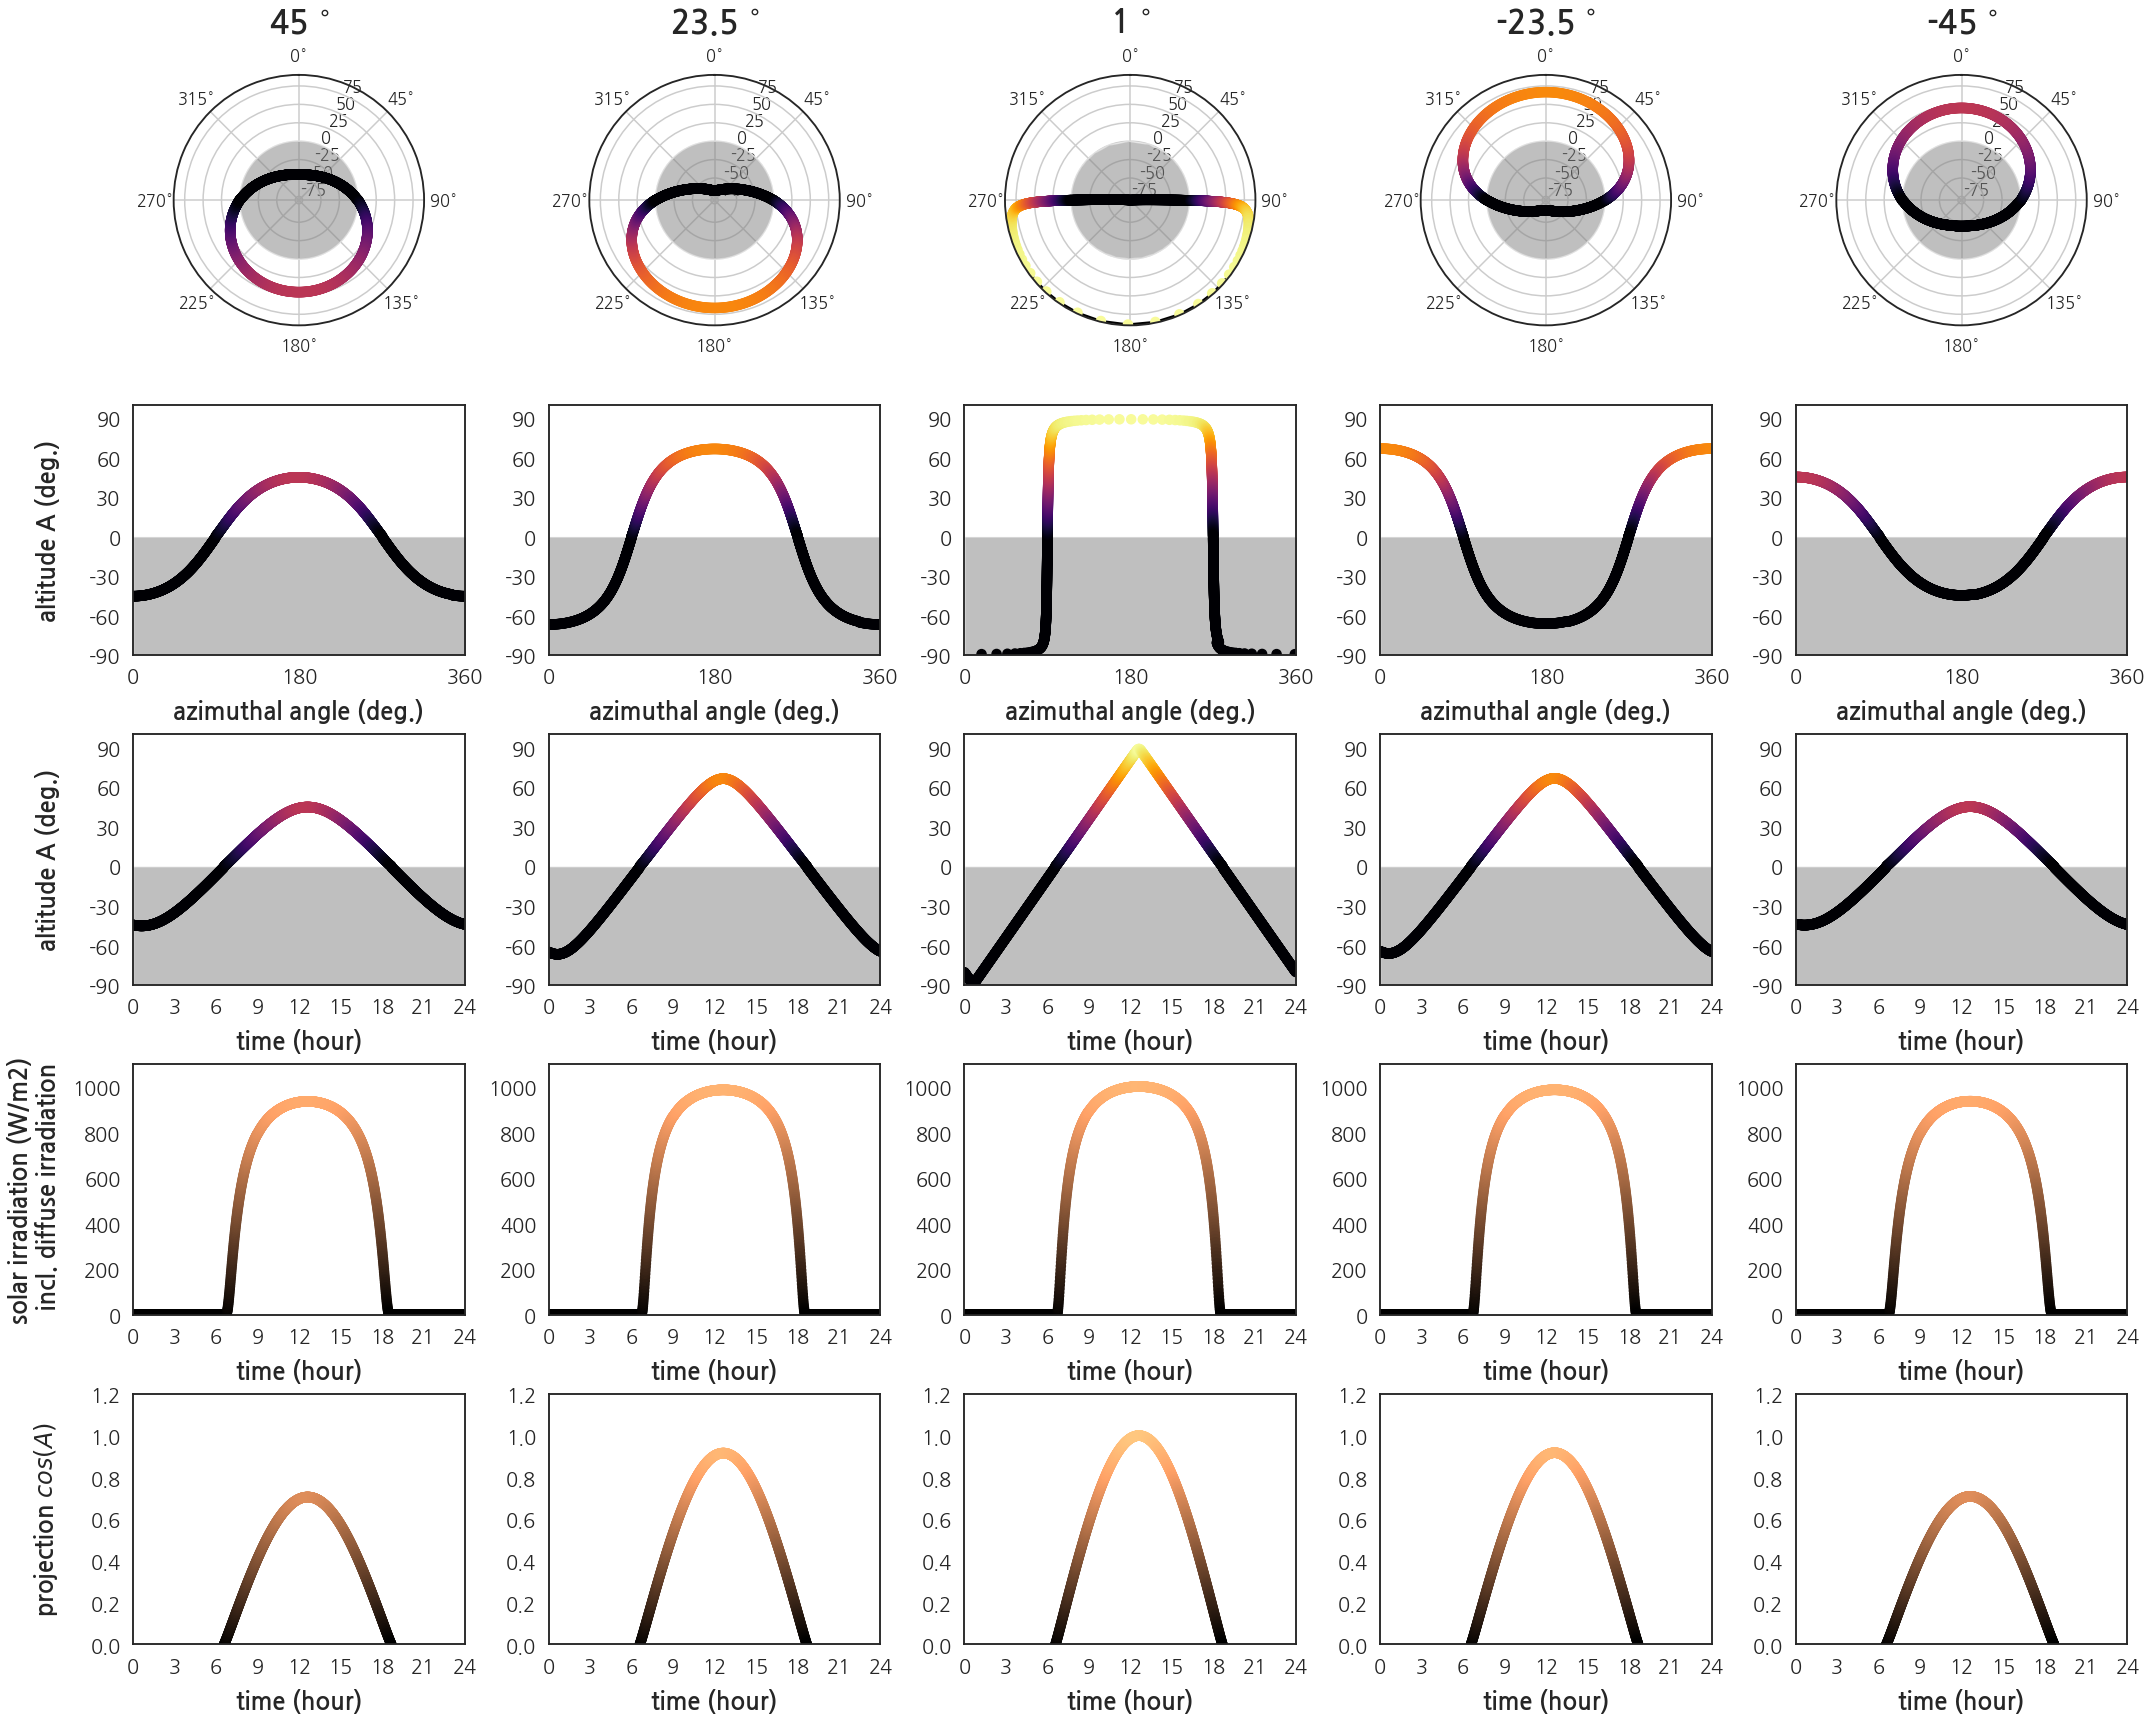

In [14]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

lats = [45, 23.5, 1, -23.5, -45]
lon = 127.3845

### data
nlats = len(lats)
alts_lat = {}
azis_lat = {}
date_hr_lat = {}

### altitudes and azimuthal angles
for i, lat in enumerate(lats, 1):
    alts, azis, dates_hr = [], [], []
    for hr in range(24):
        for min in range(0, 60, 1):
            date_hr = datetime.datetime(2017, 3, 20, hr, min, 0, tzinfo=KST)
            dates_hr.append(date_hr)
            alt = get_altitude(lat, lon, date_hr)
            azi = get_azimuth(lat, lon, date_hr)
            alts.append(alt)
            azis.append(azi)

    date_hr_lat[i] = dates_hr
    alts = np.array(alts)      
    alts_lat[i] = alts
    azis = np.array(azis)
    azis_lat[i] = azis
    

### Figure
fig = plt.figure(figsize=(30,24))
axs = {}

for i, (lat) in enumerate(lats, 1):  
    axs[i] = fig.add_subplot(5, nlats, i, projection='polar')
    
    axs[i].set_theta_zero_location("N")
    axs[i].set_theta_direction(-1)

    axs[i].plot(np.deg2rad(azis_lat[i]), alts_lat[i], c="k", zorder=1)
    axs[i].scatter(np.deg2rad(azis_lat[i]), alts_lat[i], c=alts_lat[i], 
                   cmap="inferno", zorder=2, vmin=0, vmax=90)

    axs[i].fill(np.deg2rad(azis_lat[i]), [0]*len(azis_lat[i]), "gray", alpha=0.5)
    axs[i].set_ylim(-80, 90)
    axs[i].set_title(f"{lat}" + " $^{\circ}$", fontdict={"fontsize":32, "fontweight":"bold"}, pad=16)

# azimuth vs altitude
hrs = list(range(1440))
for i, (lat) in enumerate(lats, nlats+1):  
    axs[i] = fig.add_subplot(5, nlats, i)
    axs[i].scatter(azis_lat[i-nlats], alts_lat[i-nlats], c=alts_lat[i-nlats], 
                   cmap="inferno", zorder=2, vmin=0, vmax=90)
    
    axs[i].xaxis.set_major_locator(MultipleLocator(180))
    axs[i].xaxis.set_minor_locator(MultipleLocator(60))
    
    axs[i].set_xlim(0, 360)
    axs[i].set_ylim(-90, 100)
    yticks = [-90, -60, -30, 0, 30, 60, 90]
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(yticks)
    axs[i].tick_params(axis="both", labelsize=20)
    axs[i].fill_between(hrs, -90, 0, facecolor="gray", alpha=0.5)
    axs[i].set_xlabel("azimuthal angle (deg.)", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)
    if i == nlats+1:
        axs[i].set_ylabel("altitude A (deg.)", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)

# time vs altitude
hrs = list(range(1440))
for i, (lat) in enumerate(lats, 2*nlats+1):  
    axs[i] = fig.add_subplot(5, nlats, i)
    axs[i].scatter(hrs, alts_lat[i-2*nlats], c=alts_lat[i-2*nlats], 
                   cmap="inferno", zorder=2, vmin=0, vmax=90)
    
    axs[i].xaxis.set_major_locator(MultipleLocator(180))
    axs[i].xaxis.set_minor_locator(MultipleLocator(60))
    
    axs[i].set_xlim(0, 1440)
    axs[i].set_ylim(-90, 100)
    xticks = [int(x//60) for x in axs[i].get_xticks()]
    axs[i].set_xticklabels(xticks)
    axs[i].set_xlabel("time (hour)", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)
    axs[i].set_xticklabels(xticks)
    yticks = [-90, -60, -30, 0, 30, 60, 90]
    axs[i].set_yticks(yticks)
    axs[i].set_yticklabels(yticks)
    axs[i].tick_params(axis="both", labelsize=20)
    axs[i].fill_between(hrs, -90, 0, facecolor="gray", alpha=0.5)
    if i == 2*nlats+1:
        axs[i].set_ylabel("altitude A (deg.)", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)

# irradiation accounting for the scattering of light (by US atmosphere model)     
for i, lat in enumerate(lats, 3*nlats+1):
    axs[i] = fig.add_subplot(5, nlats, i)
    
    # irradiation by pysolar
    irrs_pysolar = []
    for j in range(len(date_hr_lat[i-(3*nlats)])):
        irr_pysolar = get_radiation_direct(date_hr_lat[i-(3*nlats)][j], 
                                           alts_lat[i-(3*nlats)][j])
        irrs_pysolar.append(irr_pysolar)
    
    axs[i].scatter(hrs, irrs_pysolar, c=irrs_pysolar, 
                   cmap="copper", zorder=2, vmin=0, vmax=1100)
    axs[i].xaxis.set_major_locator(MultipleLocator(180))
    axs[i].xaxis.set_minor_locator(MultipleLocator(60))
    axs[i].set_xlim(0, 1440)
    xticks = [int(x//60) for x in axs[i].get_xticks()]
    axs[i].set_xticklabels(xticks)
    axs[i].set_xlabel("time (hour)", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)
    axs[i].tick_params(axis="both", labelsize=20)   
    axs[i].set_ylim(0, 1100)
    if i == 3*nlats+1:
        axs[i].set_ylabel("solar irradiation (W/m2)\n incl. diffuse irradiation", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)

# direct irradiation, above the atmosphere 
for i, lat in enumerate(lats, 4*nlats+1):
    axs[i] = fig.add_subplot(5, nlats, i)
    irradiation = np.sin(np.deg2rad(alts_lat[i-(4*nlats)]))
    axs[i].scatter(hrs, irradiation, c=irradiation, 
                   cmap="copper", zorder=2, vmin=0, vmax=1)
    axs[i].xaxis.set_major_locator(MultipleLocator(180))
    axs[i].xaxis.set_minor_locator(MultipleLocator(60))
    axs[i].set_xlim(0, 1440)
    xticks = [int(x//60) for x in axs[i].get_xticks()]
    axs[i].set_xticklabels(xticks)
    axs[i].set_xlabel("time (hour)", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)
    axs[i].tick_params(axis="both", labelsize=20)   
    axs[i].set_ylim(0, 1.2)
    if i == 4*nlats+1:
        axs[i].set_ylabel("projection " + "$cos(A)$", fontdict={"fontsize":24, "fontweight":"bold"}, labelpad=12)

fig.align_ylabels([axs[1], axs[6], axs[11], axs[16], axs[21]])    
fig.tight_layout()    
fig.savefig("4_pysolar_1.png")    

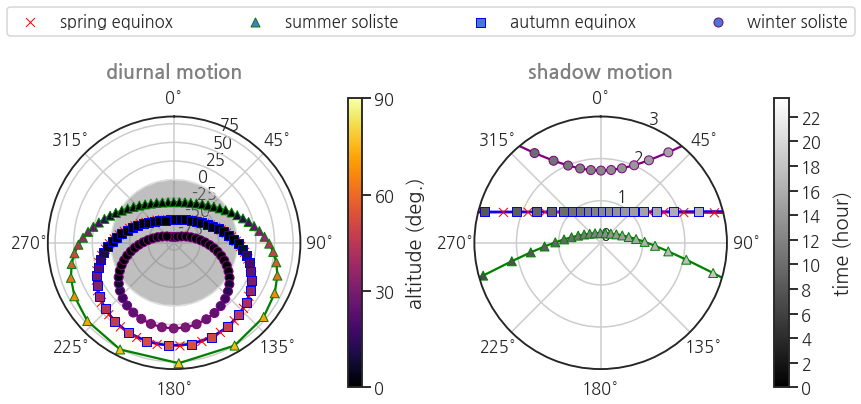

In [12]:
# Daejeon
lat = 36.3504
lon = 127.3845

# dates
months = [3, 6, 9, 12]
dates = [21, 21, 23, 22]
colors = ["red", "green", "blue", "purple"]
markers = ["x", "^", "s", "o"]

alts, azis = {}, {}
for month, date in zip(months, dates):
    alts[month], azis[month] = [], []
    for hr in range(24):
        for minu in range(0, 60, 30):
            date_hr = datetime.datetime(2017, month, date, hr, minu, 0, tzinfo=KST)
            alt = get_altitude(lat, lon, date_hr)
            azi = get_azimuth(lat, lon, date_hr)
            alts[month].append(alt)
            azis[month].append(azi)
    
    alts[month] = np.array(alts[month])        
    azis[month] = np.array(azis[month])
            

### visualziation
fig = plt.figure(figsize=(12,6))

# diurnal motion
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.fill(np.deg2rad(azis[3]), [0]*len(azis[3]), "gray", alpha=0.5)

for month, marker, color in zip(months, markers, colors):
    ax1.plot(np.deg2rad(azis[month]), alts[month], c=color, zorder=1)
    im1 = ax1.scatter(np.deg2rad(azis[month]), alts[month], marker=marker,
                      c=alts[month], ec=color, lw=1, cmap="inferno", 
                      vmin=0, vmax=90, zorder=2)

cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.15, ticks= [0, 30, 60, 90])
cbar1.set_label("altitude (deg.)", fontsize=20, labelpad=12)    

ax1.set_title("diurnal motion", fontdict={"fontsize":20, "color":"gray", "fontweight":"bold"}, pad=12)

# shadow
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1)
# cmaps = ["Reds_r", "Greens_r", "Blues_r", "Purples_r"]
time_arr = np.linspace(0, 47, 48)/2
handles = []

for month, color, marker in zip(months, colors, markers):
    shadow_idx = np.where(alts[month]>0)[0]
    shadow_azis_rad = np.deg2rad(azis[month][shadow_idx]+180)
    shadow_lengths = 1/np.tan(np.deg2rad(alts[month][shadow_idx]))
#     shadows_x = -shadow_lengths * np.sin(shadow_azis_rad)
#     shadows_y = -shadow_lengths * np.cos(shadow_azis_rad)
    ax2.plot(shadow_azis_rad, shadow_lengths, c=color, zorder=1)
    im2 = ax2.scatter(shadow_azis_rad, shadow_lengths, marker=marker,
                      c=time_arr[shadow_idx], ec=color, lw=1, cmap="gist_gray", 
                      vmin=0, vmax=23.5, zorder=2)
    handles.append(im2)
    
ax2.set_ylim(0, 3)
ax2.yaxis.set_major_locator(MultipleLocator(1))

cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.15, ticks= list(range(0, 28, 2)))
cbar2.set_label("time (hour)", fontsize=20, labelpad=12)    

ax2.set_title("shadow motion", fontdict={"fontsize":20, "color":"gray", "fontweight":"bold"}, pad=12)

fig.legend(handles=handles, labels=["spring equinox", "summer soliste", "autumn equinox", "winter soliste"],
           ncol=4, bbox_to_anchor=(0., 0.9, 1., .1), mode="expand")
fig.tight_layout(rect=[0,0,1,0.9])    
fig.savefig("4_pysolar_2.png")    

In [30]:
# Daejeon
lat = 36.3504
lon = 127.3845

# Spring equinox
date = datetime.datetime(2017, 3, 21, 13, 0, 0, tzinfo=KST)

alts, azis = [], []
for hr in range(24):
    for minu in range(0, 60, 1):
        date_hr = datetime.datetime(2017, 3, 21, hr, minu, 0, tzinfo=KST)
        alt = get_altitude(lat, lon, date_hr)
        azi = get_azimuth(lat, lon, date_hr)
        alts.append(alt)
        azis.append(azi)

alts = np.array(alts)
azis = np.array(azis)

# irradiation
irrs_pysolar = []
for i in range(1440):
    irrs_pysolar.append(get_radiation_direct(date, alts[i]))
    
# projection
proj = np.sin(np.deg2rad(alts))

# shadow x, shadow y
shadow_idx = np.where(alts > 0)[0]
azis_rad = np.deg2rad(azis[shadow_idx])
alts_rad = np.deg2rad(alts[shadow_idx])

shadow_len = 1/np.tan(alts_rad)
shadow_x = -shadow_len * np.sin(azis_rad)
shadow_y = -shadow_len * np.cos(azis_rad)

* polar vs cartesian

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


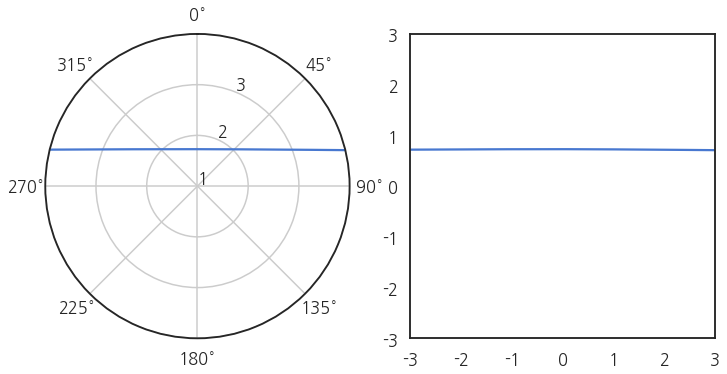

In [48]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.plot(azis_rad + np.pi, shadow_len)
ax1.set_ylim(0, 3)
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.set_yticklabels([0, 1, 2, 3])

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(shadow_x, shadow_y)
ax2.set_aspect("equal")
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

plt.show()

In [72]:
df_solar = pd.DataFrame({"time": np.array(range(1440)),
                         "hh": np.array(range(1440))//60,
                         "mm": np.array(range(1440))%60,
                         "azimuth": azis,
                         "altitude": alts,
                         "irradiation": irrs_pysolar,
                         "projection" : proj
                        })
df_solar["shadow_len"] = df_solar["altitude"].apply(lambda x: 1/np.tan(np.deg2rad(x)) if x > 0 else np.nan)
df_solar["shadow_dx"] = df_solar["shadow_len"] * np.sin(np.deg2rad(df_solar["azimuth"]))
df_solar["shadow_dy"] = df_solar["shadow_len"] * np.sin(np.deg2rad(df_solar["altitude"]))

In [73]:
df_solar

,time,hh,mm,azimuth,altitude,irradiation,projection,shadow_len,shadow_dx,shadow_dy
0,0,0,0,344.349356,-52.535824,0.0,-0.793734,NaN,NaN,NaN
1,1,0,1,344.751200,-52.589204,0.0,-0.794300,NaN,NaN,NaN
2,2,0,2,345.154012,-52.641219,0.0,-0.794851,NaN,NaN,NaN
3,3,0,3,345.557771,-52.691864,0.0,-0.795387,NaN,NaN,NaN
4,4,0,4,345.962455,-52.741133,0.0,-0.795908,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1435,1435,23,55,342.628308,-51.883481,0.0,-0.786757,NaN,NaN,NaN
1436,1436,23,56,343.022121,-51.942682,0.0,-0.787394,NaN,NaN,NaN
1437,1437,23,57,343.416966,-52.000557,0.0,-0.788017,NaN,NaN,NaN
1438,1438,23,58,343.812825,-52.057099,0.0,-0.788624,NaN,NaN,NaN


In [77]:
df_solar.to_pickle("df_solar.pkl")

* select values close to ArcGIS

In [92]:
select_values = np.linspace(90, 270+11.25, 18)
pcut = pd.cut(df_solar["azimuth"], select_values)

azis_arcgis = df_solar["azimuth"].groupby(pcut).nth(0).values
np.save("azis_arcgis.npy", azis_arcgis)

alts_arcgis = df_solar["altitude"].groupby(pcut).nth(0).values
np.save("alts_arcgis.npy", alts_arcgis)

In [93]:
azis_arcgis

array([ 90.04491251, 101.25960365, 112.60445324, 123.93456944,
       135.08209201, 146.33967243, 157.57503988, 168.78841646,
       180.16004339, 191.52753028, 202.72945289, 213.94810957,
       225.18697628, 236.31819393, 247.63910281, 258.82906716,
       270.07698777])

In [94]:
alts_arcgis

array([ 0.79544545, 15.24952518, 27.93911638, 37.52097867, 44.21475454,
       48.8200532 , 51.76810675, 53.41042681, 53.94258851, 53.39513473,
       51.73853843, 48.777803  , 44.16234504, 37.46215985, 27.87918598,
       15.39329993,  0.94154698])

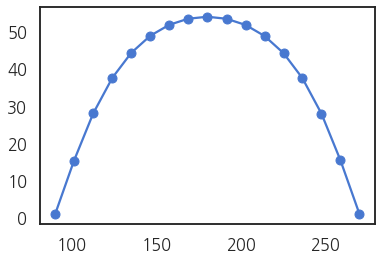

In [95]:
fig, ax = plt.subplots()
ax.plot(azis_arcgis, alts_arcgis, "o-")